In [13]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,datasets,models
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [14]:
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()
train_images=train_images.reshape((60000,28,28,1))/255.0
test_images=test_images.reshape((10000,28,28,1))/255.0
print("TRAIN IMAGES: ",train_images.shape)
print("TEST IMAGES: ",test_images.shape)

TRAIN IMAGES:  (60000, 28, 28, 1)
TEST IMAGES:  (10000, 28, 28, 1)


In [15]:
model=Sequential([
    layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(10,activation='softmax')])

In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
    )
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 6, 64)         

In [17]:
epochs=10
history=model.fit(
    train_images,train_labels,
    epochs=epochs,
    validation_data=(test_images, test_labels)
    )

Epoch 1/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1347 - accuracy: 0.9566 - val_loss: 0.0418 - val_accuracy: 0.9860
Epoch 2/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0463 - accuracy: 0.9858 - val_loss: 0.0358 - val_accuracy: 0.9886
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0334 - accuracy: 0.9899 - val_loss: 0.0314 - val_accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0253 - accuracy: 0.9919 - val_loss: 0.0556 - val_accuracy: 0.9823
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.0275 - val_accuracy: 0.9913
Epoch 6/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0184 - accuracy: 0.9942 - val_loss: 0.0281 - val_accuracy: 0.9910
Epoch 7/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.0270 -

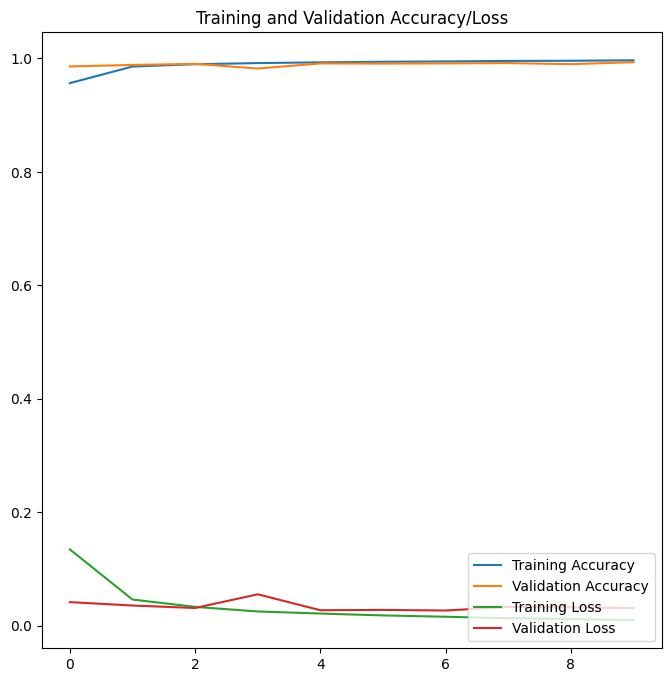

In [18]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(epochs)
plt.figure(figsize=(8,8))
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy/Loss')
plt.show()

1/1 [==============================] - 0s 69ms/step
Prediction of model: 0


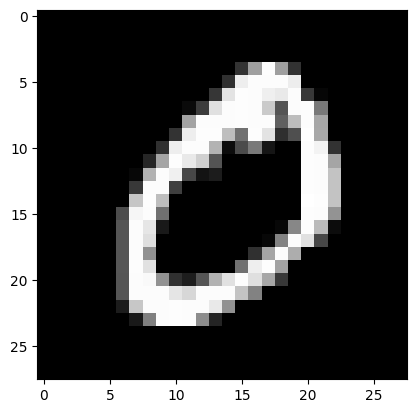

In [19]:
image=train_images[1].reshape(1,28,28,1)
prediction=np.argmax(model.predict(image),axis=-1)
plt.imshow(image.reshape(28,28),cmap='gray')
print('Prediction of model:',prediction[0])

1/1 [==============================] - 0s 21ms/step


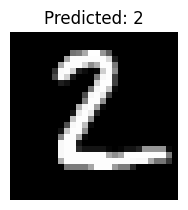

1/1 [==============================] - 0s 21ms/step


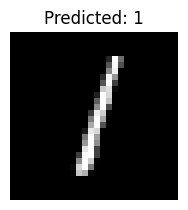

1/1 [==============================] - 0s 17ms/step


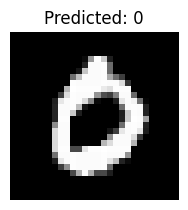

1/1 [==============================] - 0s 18ms/step


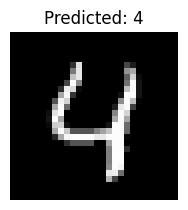

In [20]:
images=test_images[1:5]
for i,test_image in enumerate(images,start=1):
    prediction=np.argmax(model.predict(test_image.reshape(1,28,28,1)),axis=-1)
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted: {}".format(prediction[0]))
    plt.imshow(test_image.reshape(28, 28),cmap='gray')
    plt.show()

1/1 [==============================] - 0s 75ms/step
Prediction of loaded model: 4


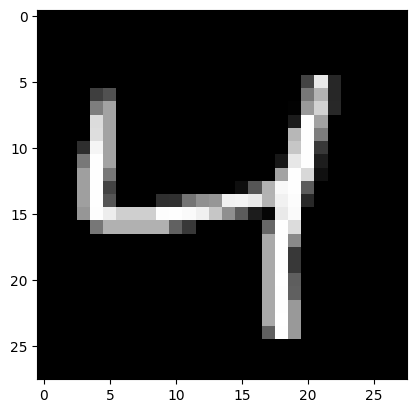

In [21]:
model.save("mnist_cnn.h5")
loaded_model=models.load_model("mnist_cnn.h5")
image=train_images[2].reshape(1,28,28,1)
prediction=np.argmax(loaded_model.predict(image),axis=-1)
plt.imshow(image.reshape(28,28),cmap='gray')
print('Prediction of loaded model:',prediction[0])

In [22]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print("\nTest accuracy:",test_acc)

313/313 - 3s - loss: 0.0314 - accuracy: 0.9935 - 3s/epoch - 8ms/step

Test accuracy: 0.9934999942779541


313/313 [==============================] - 3s 10ms/step


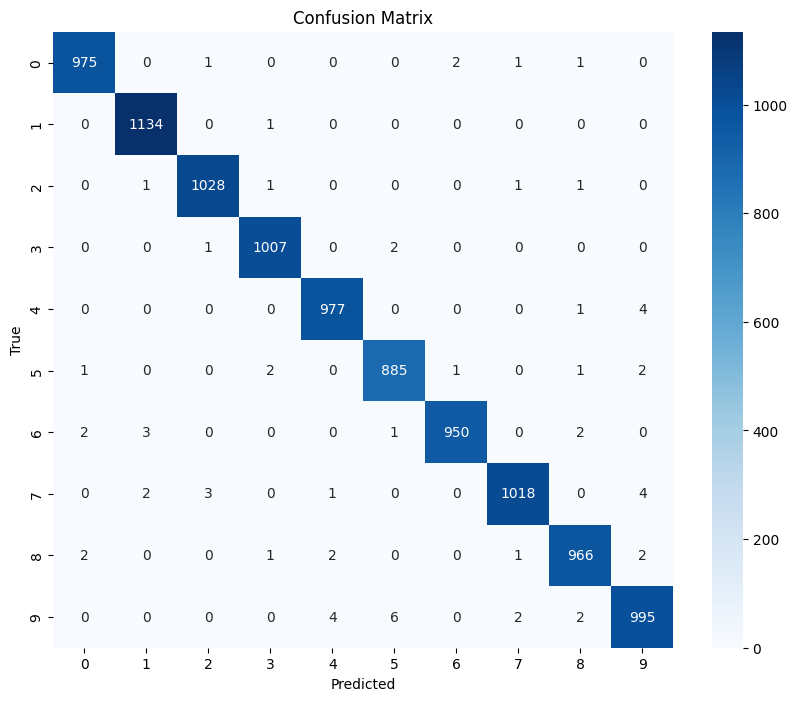

In [23]:
y_pred=np.argmax(model.predict(test_images),axis=-1)
cm=confusion_matrix(test_labels,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [24]:
print("\nClassification Report:\n")
print(classification_report(test_labels,y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       1.00      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

